In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
digits_train=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)

In [3]:
digits_test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)

In [11]:
digits_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
           dtype='int64')

In [9]:
X_train=digits_train[np.arange(64)]
y_train=digits_train[64]
X_test=digits_test[np.arange(64)]
y_test=digits_test[64]

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans_y_pred=kmeans.predict(X=X_test)

* 对于评估聚类算法的性能，特别是应用在没有标注类别的数据集上的时候。正对不同的数据特点，作者提供两种方式。
* 如果被用来评估的数据本身带有正确的标记信息，那么可以使用ARS（adjusted rand score）,ARI指标与分类问题中的accuracy的方法类似，同时也兼顾到了类簇无法和分类一一对应的问题

In [17]:
from sklearn.metrics import adjusted_rand_score

In [18]:
print(adjusted_rand_score(labels_true=y_test,labels_pred=kmeans_y_pred))

0.6625257974849977


# 利用轮廓系数评价不同类簇数量的K-means聚类实例

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

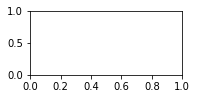

In [20]:
plt.subplot(3,2,1)

In [21]:
x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])

In [39]:
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

In [42]:
X

array([[1, 1],
       [2, 3],
       [3, 2],
       [1, 2],
       [5, 8],
       [6, 6],
       [5, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [7, 1],
       [9, 3]])

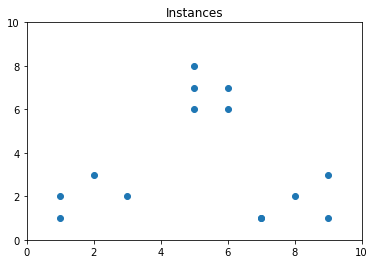

In [47]:
# 对一号子图做出原始数据点阵的分布
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

In [48]:
colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']

[1 1 1 1 1 1 1 1 1 0 0 0 0 0]
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 0
10 0
11 0
12 0
13 0
[2 2 2 2 0 0 0 0 0 1 1 1 1 1]
0 2
1 2
2 2
3 2
4 0
5 0
6 0
7 0
8 0
9 1
10 1
11 1
12 1
13 1
[2 2 2 2 0 0 0 0 0 3 1 1 3 1]
0 2
1 2
2 2
3 2
4 0
5 0
6 0
7 0
8 0
9 3
10 1
11 1
12 3
13 1
[2 4 4 2 1 1 1 1 1 0 3 3 0 3]
0 2
1 4
2 4
3 2
4 1
5 1
6 1
7 1
8 1
9 0
10 3
11 3
12 0
13 3
[0 7 3 0 5 1 5 1 1 4 2 2 4 6]
0 0
1 7
2 3
3 0
4 5
5 1
6 5
7 1
8 1
9 4
10 2
11 2
12 4
13 6


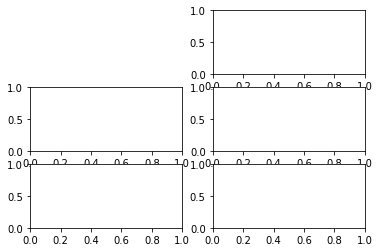

In [70]:
clusters=[2,3,4,5,8]
subplot_counter=1
sc_score=[]
for t in clusters:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t,random_state=33).fit(X)
    print(kmeans_model.labels_)
# [1 1 1 1 1 1 1 1 1 0 0 0 0 0]
# [2 2 2 2 0 0 0 0 0 1 1 1 1 1]
# [2 2 2 2 0 0 0 0 0 3 1 1 3 1]
# [2 4 4 2 1 1 1 1 1 0 3 3 0 3]
# [0 7 3 0 5 1 5 1 1 4 2 2 4 6]
    for i ,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],)
        
                                                       
    
    